# The following analysis covers immigration from other places to Washington State

It explores the forcastability of immigration to Washington State. 



The dataset was derived from Department of Licensing and mad publicly available on Data.gov

In [44]:
#-- Importing Nessesary Libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/New drivers licenses from out of state/Driver_Licenses_and_ID_Cards_Transferred_to_Washington.csv')

In [3]:
df.columns

Index(['Count of New WA State Driver Licenses and ID Cards', 'Year', 'Month',
       'Month Name', 'Issue Date', 'Card Type Issued', 'County of Residence',
       'Prior State of USA Issued License or ID',
       'Country Issuing Previous License or ID', 'ISO 2 Alpha code',
       'ISO 3 Alpha code', 'ISO Numeric Code', 'IRS Country Code',
       'Card Origin'],
      dtype='object')

In [4]:
df.shape

(994065, 14)

In [5]:
df.dropna

<bound method DataFrame.dropna of         Count of New WA State Driver Licenses and ID Cards  Year  Month  \
0                                                       1   2019     11   
1                                                       1   2020      9   
2                                                       1   2018     11   
3                                                       1   2021      8   
4                                                       1   2022      1   
...                                                   ...    ...    ...   
994060                                                  1   2023      3   
994061                                                  1   2018     12   
994062                                                  1   2023      1   
994063                                                  1   2022     10   
994064                                                  1   2019     12   

       Month Name  Issue Date Card Type Issued County of Residenc

# Exploring the top 20 countries that people have immigrated from.

In [6]:
df['Country Issuing Previous License or ID'].value_counts().head(20)

USA                         903318
Canada                       10052
Mexico                        8637
Ukraine                       7980
South Korea                   5163
India                         4842
Guam                          3288
Russia                        3144
Venezuela                     3129
Japan                         2989
China                         2988
Taiwan                        2960
Colombia                      2597
Brazil                        2566
American Samoa                2234
Kyrgyzstan                    1987
Germany                       1976
Romania                       1672
Puerto Rico                   1469
Northern Mariana Islands       941
Name: Country Issuing Previous License or ID, dtype: int64

# Exploring the top 20 States that people moved from.

In [7]:
df['Prior State of USA Issued License or ID'].value_counts().head(20)

California        208080
Oregon            108752
Not Applicable     90747
Texas              59176
Florida            40608
Arizona            40544
Idaho              33765
Colorado           30349
Illinois           22223
New York           21996
Nevada             20748
Virginia           17570
Georgia            17547
Utah               17050
Hawaii             16635
North Carolina     15733
Alaska             14874
Pennsylvania       13985
Montana            13597
Michigan           13274
Name: Prior State of USA Issued License or ID, dtype: int64

# Top 20 counties move to in Washington

In [8]:
df['County of Residence'].value_counts().head(20)

King            369115
Pierce          102777
Clark           100045
Snohomish        75697
Spokane          64203
Thurston         39896
Kitsap           38930
Whatcom          26896
Benton           20473
Island           14035
Yakima           12379
Cowlitz          12075
Clallam          11139
Skagit           10745
Whitman           8099
Lewis             7069
Grays Harbor      6962
Grant             6737
Walla Walla       6582
Franklin          6268
Name: County of Residence, dtype: int64

In [9]:
df.Year.min()

2018

In [10]:
df.Year.max()

2024

# Exploring the immigration over time

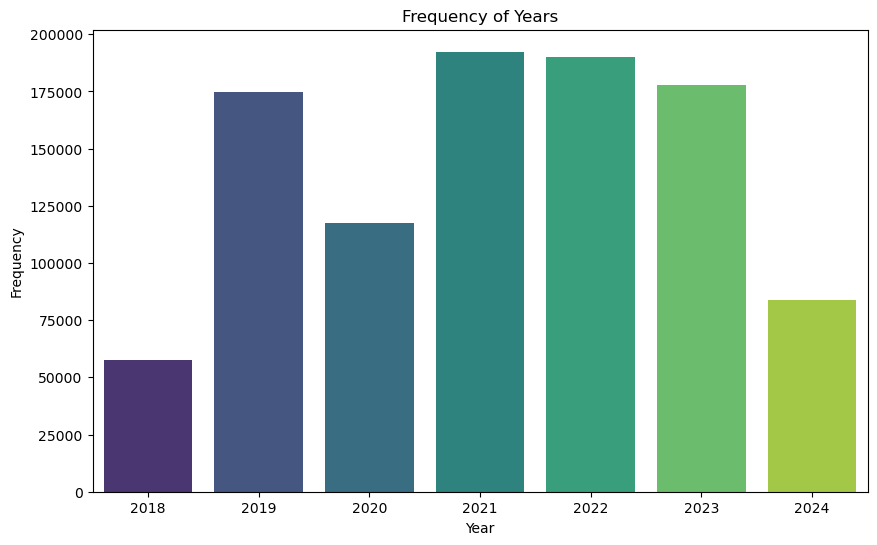

In [11]:
# Calculate the frequency of each year
year_counts = df['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Years')
plt.show()

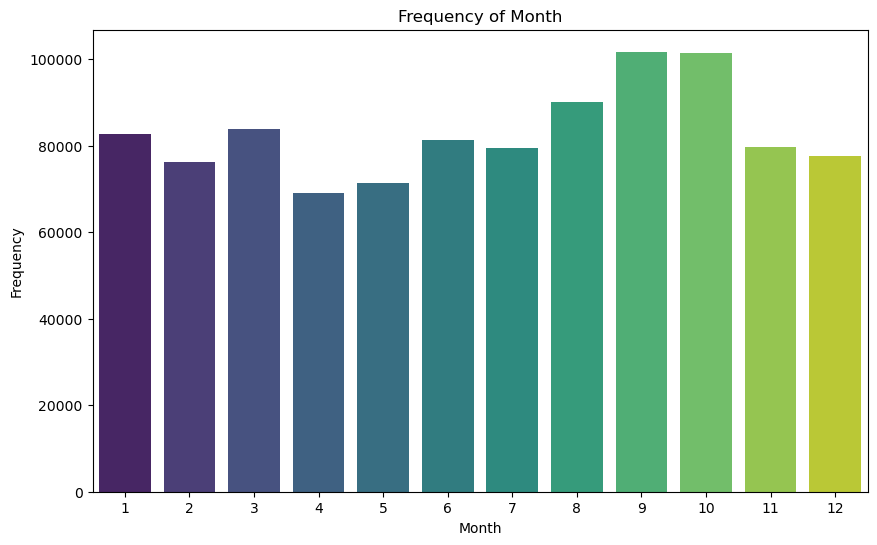

In [12]:
# Calculate the frequency of each year
year_counts = df['Month'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Month')
plt.show()

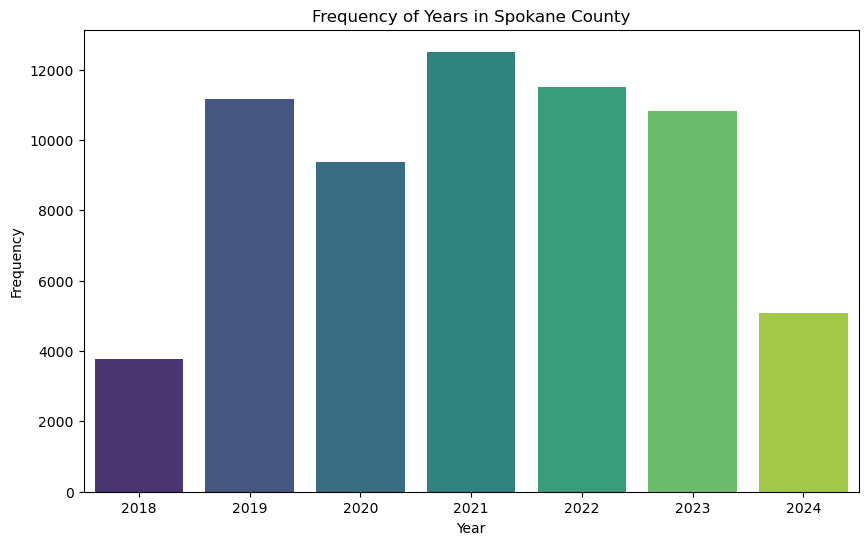

In [13]:
# Filter the DataFrame to only include rows where 'County of Residence' is 'Spokane'
df_spokane = df[df['County of Residence'] == 'Spokane']

# Calculate the frequency of each year
year_counts = df_spokane['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Years in Spokane County')
plt.show()

# Now exploring immigration per county

In [14]:
df.columns

Index(['Count of New WA State Driver Licenses and ID Cards', 'Year', 'Month',
       'Month Name', 'Issue Date', 'Card Type Issued', 'County of Residence',
       'Prior State of USA Issued License or ID',
       'Country Issuing Previous License or ID', 'ISO 2 Alpha code',
       'ISO 3 Alpha code', 'ISO Numeric Code', 'IRS Country Code',
       'Card Origin'],
      dtype='object')

# Exploring people from Unkown 

In [15]:
unk = df[df['Prior State of USA Issued License or ID'] == 'Not Applicable']

In [16]:
unk.shape

(90747, 14)

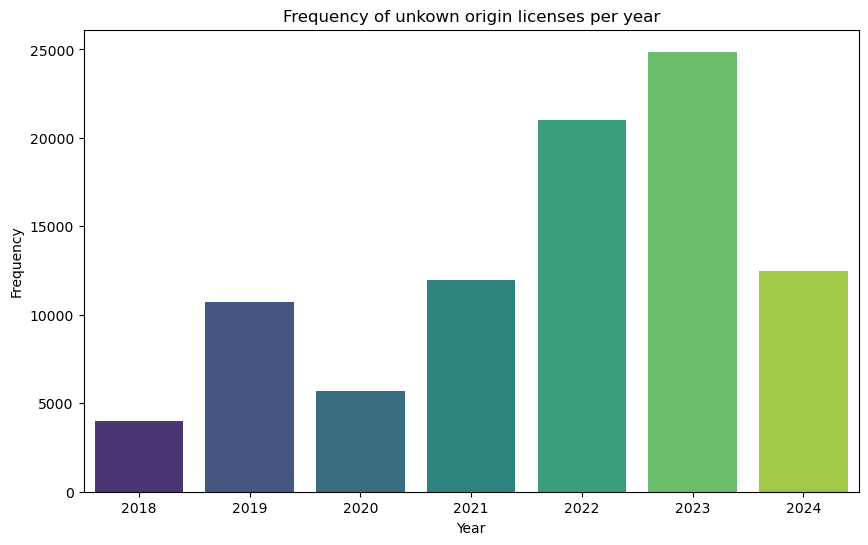

In [17]:
# Calculate the frequency of each year
year_counts = unk['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of unkown origin licenses per year')
plt.show()

In [18]:
unk['County of Residence'].value_counts().head(20)

King            49827
Snohomish       11054
Pierce           9126
Clark            4999
Spokane          2363
Whatcom          1911
Thurston         1695
Yakima           1353
Kitsap           1297
Benton           1069
Grant             783
Franklin          772
Skagit            592
Grays Harbor      555
Whitman           548
Chelan            401
Cowlitz           336
Island            310
Douglas           266
Lewis             225
Name: County of Residence, dtype: int64

In [19]:
# Check the size of the original DataFrame
original_size = unk.shape[0]

# Filter the DataFrame to only include rows where 'County of Residence' is 'Spokane'
df_spokane = unk[unk['County of Residence'] == 'Spokane']

# Check the size of the filtered DataFrame
filtered_size = df_spokane.shape[0]

# Print both sizes
print(f"Original size: {original_size}")
print(f"Filtered size: {filtered_size}")

Original size: 90747
Filtered size: 2363


# Now exploring people from Mexico

In [23]:
mex = df[df['Country Issuing Previous License or ID'] == 'Mexico']

In [24]:
mex.shape

(8637, 14)

In [25]:
mex['County of Residence'].value_counts().head(20)

King            2596
Snohomish       1063
Yakima           827
Pierce           717
Clark            537
Franklin         386
Grant            364
Benton           280
Spokane          195
Chelan           191
Skagit           187
Thurston         185
Whatcom          156
Douglas          152
Cowlitz          129
Grays Harbor     102
Kitsap            93
Lewis             82
Adams             81
Walla Walla       59
Name: County of Residence, dtype: int64

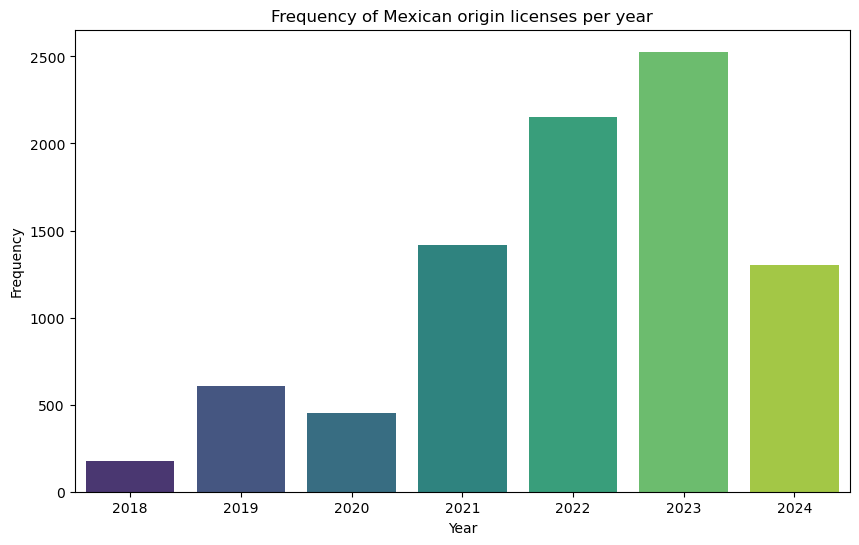

In [49]:
# Calculate the frequency of each year
year_counts = mex['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Mexican origin licenses per year')
plt.show()

# Now exploring immigration from the country of Ukraine


In [27]:
ukr = df[df['Country Issuing Previous License or ID'] == 'Ukraine']

In [28]:
ukr.shape

(7980, 14)

In [29]:
ukr['County of Residence'].value_counts().head(20)

King            2656
Snohomish       1527
Clark           1479
Pierce          1096
Spokane          617
Whatcom          115
Grays Harbor     102
Grant            101
Franklin          76
Benton            58
Skagit            55
Kitsap            20
Douglas           16
Thurston          13
Whitman            8
Island             7
Stevens            6
Clallam            6
Yakima             4
Kittitas           4
Name: County of Residence, dtype: int64

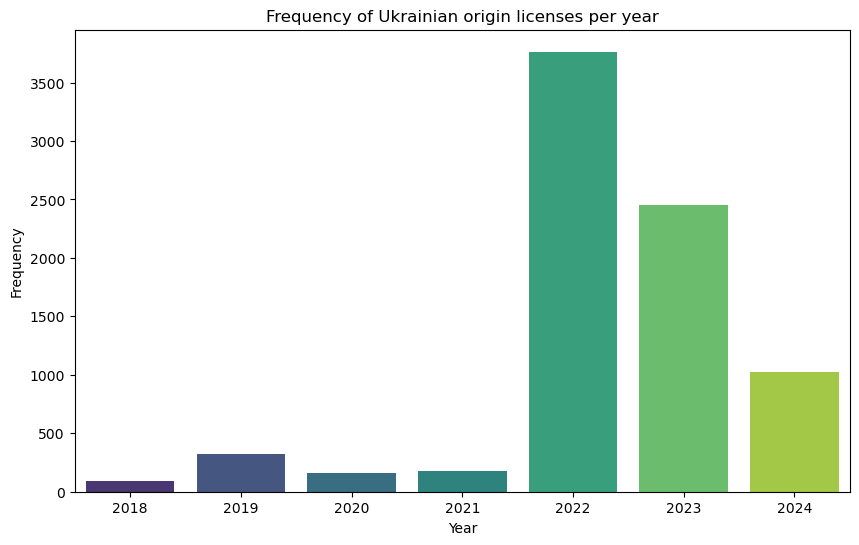

In [30]:
# Calculate the frequency of each year
year_counts = ukr['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Ukrainian origin licenses per year')
plt.show()

# Now exploring immigration from South Korea

In [31]:
sk = df[df['Country Issuing Previous License or ID'] == 'South Korea']

In [32]:
sk.shape

(5163, 14)

In [33]:
sk['County of Residence'].value_counts().head(20)

King            3449
Pierce           584
Snohomish        560
Thurston         112
Whitman           94
Clark             93
Benton            65
Spokane           42
Kitsap            33
Whatcom           26
Grant             25
Skagit            14
Walla Walla       10
Clallam            8
Kittitas           8
Yakima             6
Chelan             6
Grays Harbor       5
Lewis              4
Skamania           4
Name: County of Residence, dtype: int64

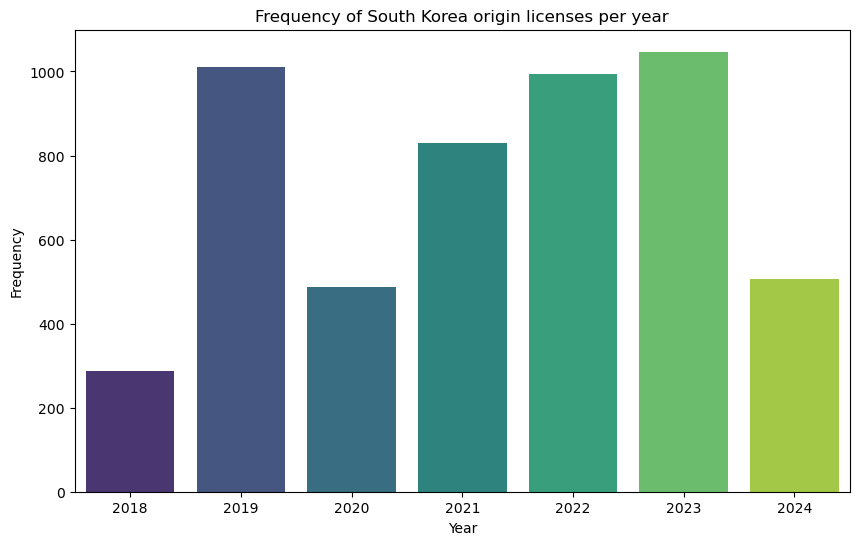

In [34]:
# Calculate the frequency of each year
year_counts = sk['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of South Korea origin licenses per year')
plt.show()

In [35]:
ind = df[df['Country Issuing Previous License or ID'] == 'India']

In [36]:
ind.shape

(4842, 14)

In [37]:
ind['County of Residence'].value_counts().head(20)

King         3948
Snohomish     318
Pierce        313
Whatcom        54
Clark          49
Spokane        37
Whitman        29
Thurston       27
Benton         12
Mason           7
Yakima          7
Skagit          6
Kitsap          6
Grant           4
Franklin        4
Lewis           4
Cowlitz         3
Clallam         2
Chelan          2
Stevens         2
Name: County of Residence, dtype: int64

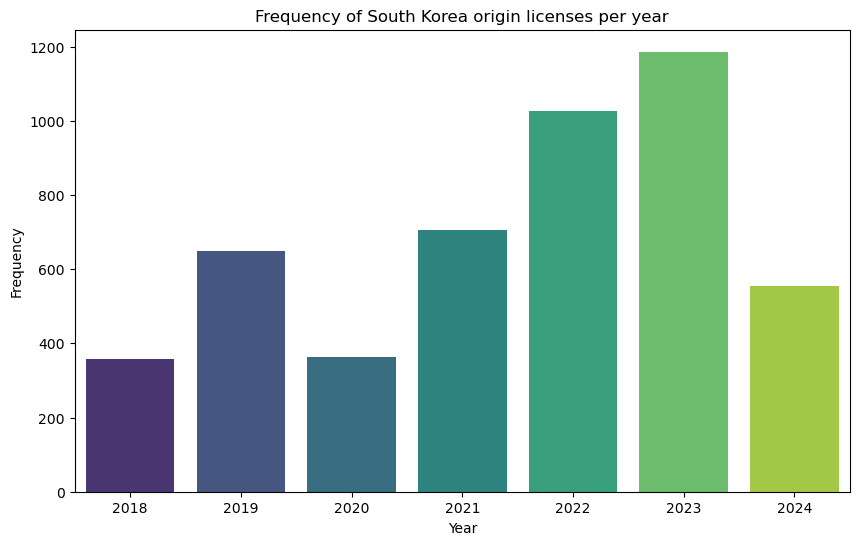

In [38]:
# Calculate the frequency of each year
year_counts = ind['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of South Korea origin licenses per year')
plt.show()

# Now exploring where the exidus from California

In [39]:
ca = df[df['Prior State of USA Issued License or ID'] == 'California']

In [40]:
ca.shape

(208080, 14)

In [41]:
ca['County of Residence'].value_counts().head(20)

King            82392
Pierce          20652
Clark           17975
Snohomish       15615
Spokane         12364
Kitsap           9567
Thurston         7969
Whatcom          6249
Island           3665
Benton           3414
Clallam          3165
Yakima           2681
Skagit           2507
Cowlitz          1985
Grays Harbor     1490
Jefferson        1439
Lewis            1435
Franklin         1395
Mason            1329
Grant            1208
Name: County of Residence, dtype: int64

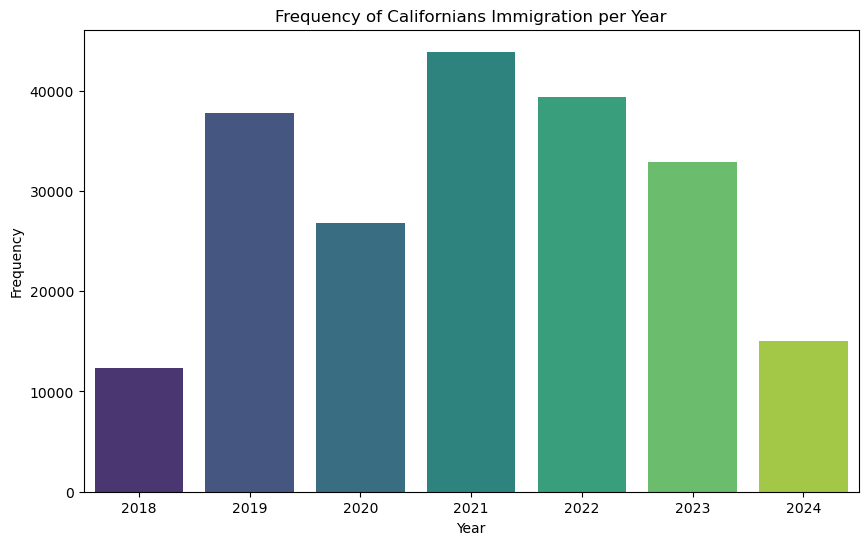

In [50]:
# Calculate the frequency of each year
year_counts = ca['Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Californians Immigration per Year')
plt.show()

# Now using machine learning to attempt to forecast future immigration 

In [48]:
frequency_counts = df['Year'].value_counts().sort_index()
df_frequency = pd.DataFrame({'Year': frequency_counts.index, 'Frequency': frequency_counts.values})

# Prepare the data for the model
X = df_frequency[['Year']]
y = df_frequency['Frequency']
# Train the Random Forest Regressor on the entire dataset
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict the next 5 years
future_years = np.array([[2024], [2025], [2026], [2027], [2028]])
future_predictions = model.predict(future_years)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Frequency': future_predictions})
print(future_df)

# Optionally, evaluate the model using a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the accuracy scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

   Year  Predicted_Frequency
0  2024            120207.37
1  2025            120207.37
2  2026            120207.37
3  2027            120207.37
4  2028            120207.37
Mean Squared Error: 4113316874.2409
R^2 Score: -0.19583412934488287


/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# In final analysis:

We accept the Null Hypothesis that the distrobution of immigration data is random and not predictiable. 

